# Looking at the functional data generated by Mehul's team: 

In [2]:
suppressMessages({
message("Loading packages")
library('ggplot2')
library('readr')
library('reshape2')
library('plyr')
library('tidyverse')
library('dplyr')
library('glue')
library("pals")
})

In [3]:
wkdir = '/Users/johnsonkate/OneDrive - National Institutes of Health/LAB_STUFF/PEOPLE/kate/manuscripts/202407_autopsy/GitHub_resources'
message("Set up working directory")
setwd(wkdir)
source(glue("{wkdir}/scripts/isolates_extra.R"))
functional_data = read.csv(glue("{wkdir}/data/binding_entry_results.csv"))

Set up working directory



In [4]:
functional_data = functional_data %>% group_by(isolate, cell_line, MOI, experiment) %>%
            mutate(fc = log10(relative_gene_expression), 
            mean_change = mean(fc),
            sd_change = sd(fc))

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's colour values.”


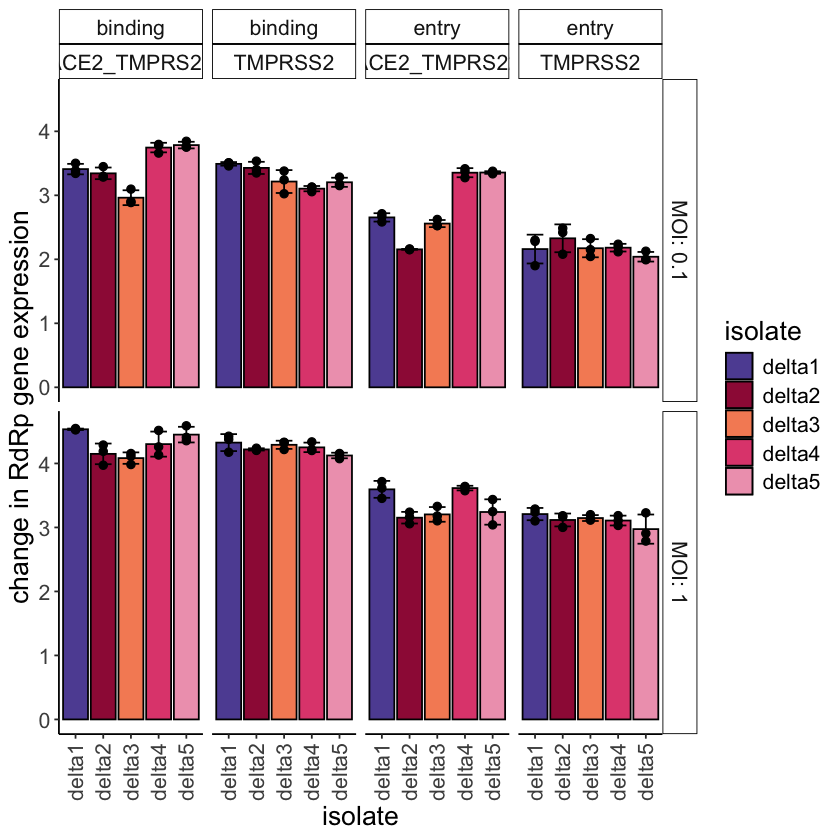

In [5]:
p1 = ggplot() +

    geom_col(data = functional_data %>% filter(isolate != 'mock' & experiment == 'entry') %>% 
                     select(mean_change, sd_change, isolate, cell_line, MOI, experiment) %>% unique(), 
            aes(x=isolate,
               group = experiment, 
               y=mean_change, fill = isolate), color = 'black') + 

    geom_col(data = functional_data %>% filter(isolate != 'mock' & experiment == 'binding') %>% 
                     select(mean_change, sd_change, isolate, cell_line, MOI, experiment) %>% unique(), 
            aes(x=isolate,
               group = experiment, 
               y=mean_change, fill = isolate), color = 'black') + 

    geom_errorbar(data = functional_data %>% filter(isolate != 'mock') %>% 
                     select(mean_change, sd_change, 
                                              isolate, cell_line, MOI, experiment) %>% unique(), 
            aes(x=isolate,
               group = experiment, 
               ymin=mean_change-sd_change, ymax = mean_change + sd_change), color = 'black', width = 0.6) + 

    geom_point(data = functional_data %>% filter(isolate != 'mock'), 
            aes(x=isolate,
               group = experiment, 
               y=log10(relative_gene_expression)), 
              size = 2, color = 'black') + 
    delta_colScale +
    delta_colScale_fill + 
    facet_grid(glue("MOI: {factor(MOI)}") ~  experiment + cell_line , space = 'free') +
    labs("isolate & cell line", y = "change in RdRp gene expression")

p1

In [6]:
#ggsave(p1,
#       filename = glue("{wkdir}/figures/isolates/use.binding-entry.moi-isolate.pdf"),
#       width = 8,
#       height = 6, limitsize=FALSE, useDingbats = FALSE)

In [7]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: aarch64-apple-darwin20.0.0 (64-bit)
Running under: macOS 14.7.2

Matrix products: default
BLAS/LAPACK: /opt/anaconda3/envs/renv1/lib/libopenblas.0.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pals_1.9        glue_1.7.0      lubridate_1.9.3 forcats_1.0.0  
 [5] stringr_1.5.1   dplyr_1.1.4     purrr_1.0.2     tidyr_1.3.1    
 [9] tibble_3.2.1    tidyverse_2.0.0 plyr_1.8.9      reshape2_1.4.4 
[13] readr_2.1.5     ggplot2_3.5.1  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.13       pillar_1.9.0      compiler_4.2.3    base64enc_0.1-3  
 [5] tools_4.2.3       digest_0.6.37     uuid_1.2-1        timechange_0.3.0 
 [9] jsonlite_1.8.8    evaluate_0.24.0   lifecycle_1.0.4   gtable_0.3.5     
[13] pkgconfig_2.0.3   rlang_1.1.4       IRdisplay_1.1     cli_3.6.3        
[17] mapproj